# Analysis of the genomic position of ascr#10 responsive genes

In this notebook, I partition the ascr#10 responsive genes by chromosome, and later by position per chromosome.

In [3]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('text', usetex=False)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 
mpl.rcParams['legend.fontsize'] = 16

# load data:
res = pd.read_csv('../data/master_table.tsv', sep='\t', index_col=0)
res.sort_values(['chromosome', 'startposition'], inplace=True)
# OR and AND conditions for DEGs in 50 and 58 hr experiments.
OR = (res['padj-58'] < 0.05) | (res['padj-50'] < 0.05)
AND = (res['padj-58'] < 0.05) & (res['padj-50'] < 0.05)

# keep only DEGs in at least ONE experiment to make our DF smaller
res = res[OR]

## Do all chromosomes behave similarly?

The plot below, which shows the DEGs in the union of both experiments, suggests that yes, all chromosomes behave similarly, with no notable differences in magnitude, though it could be the case that the ascr#10 response is enriched among a couple of chromosomes. Later, we will test representation more formally.

One thing that should be clearly noticeable is that the average up-regulation is of considerably smaller magnitude than the average down-regulation magnitude.

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


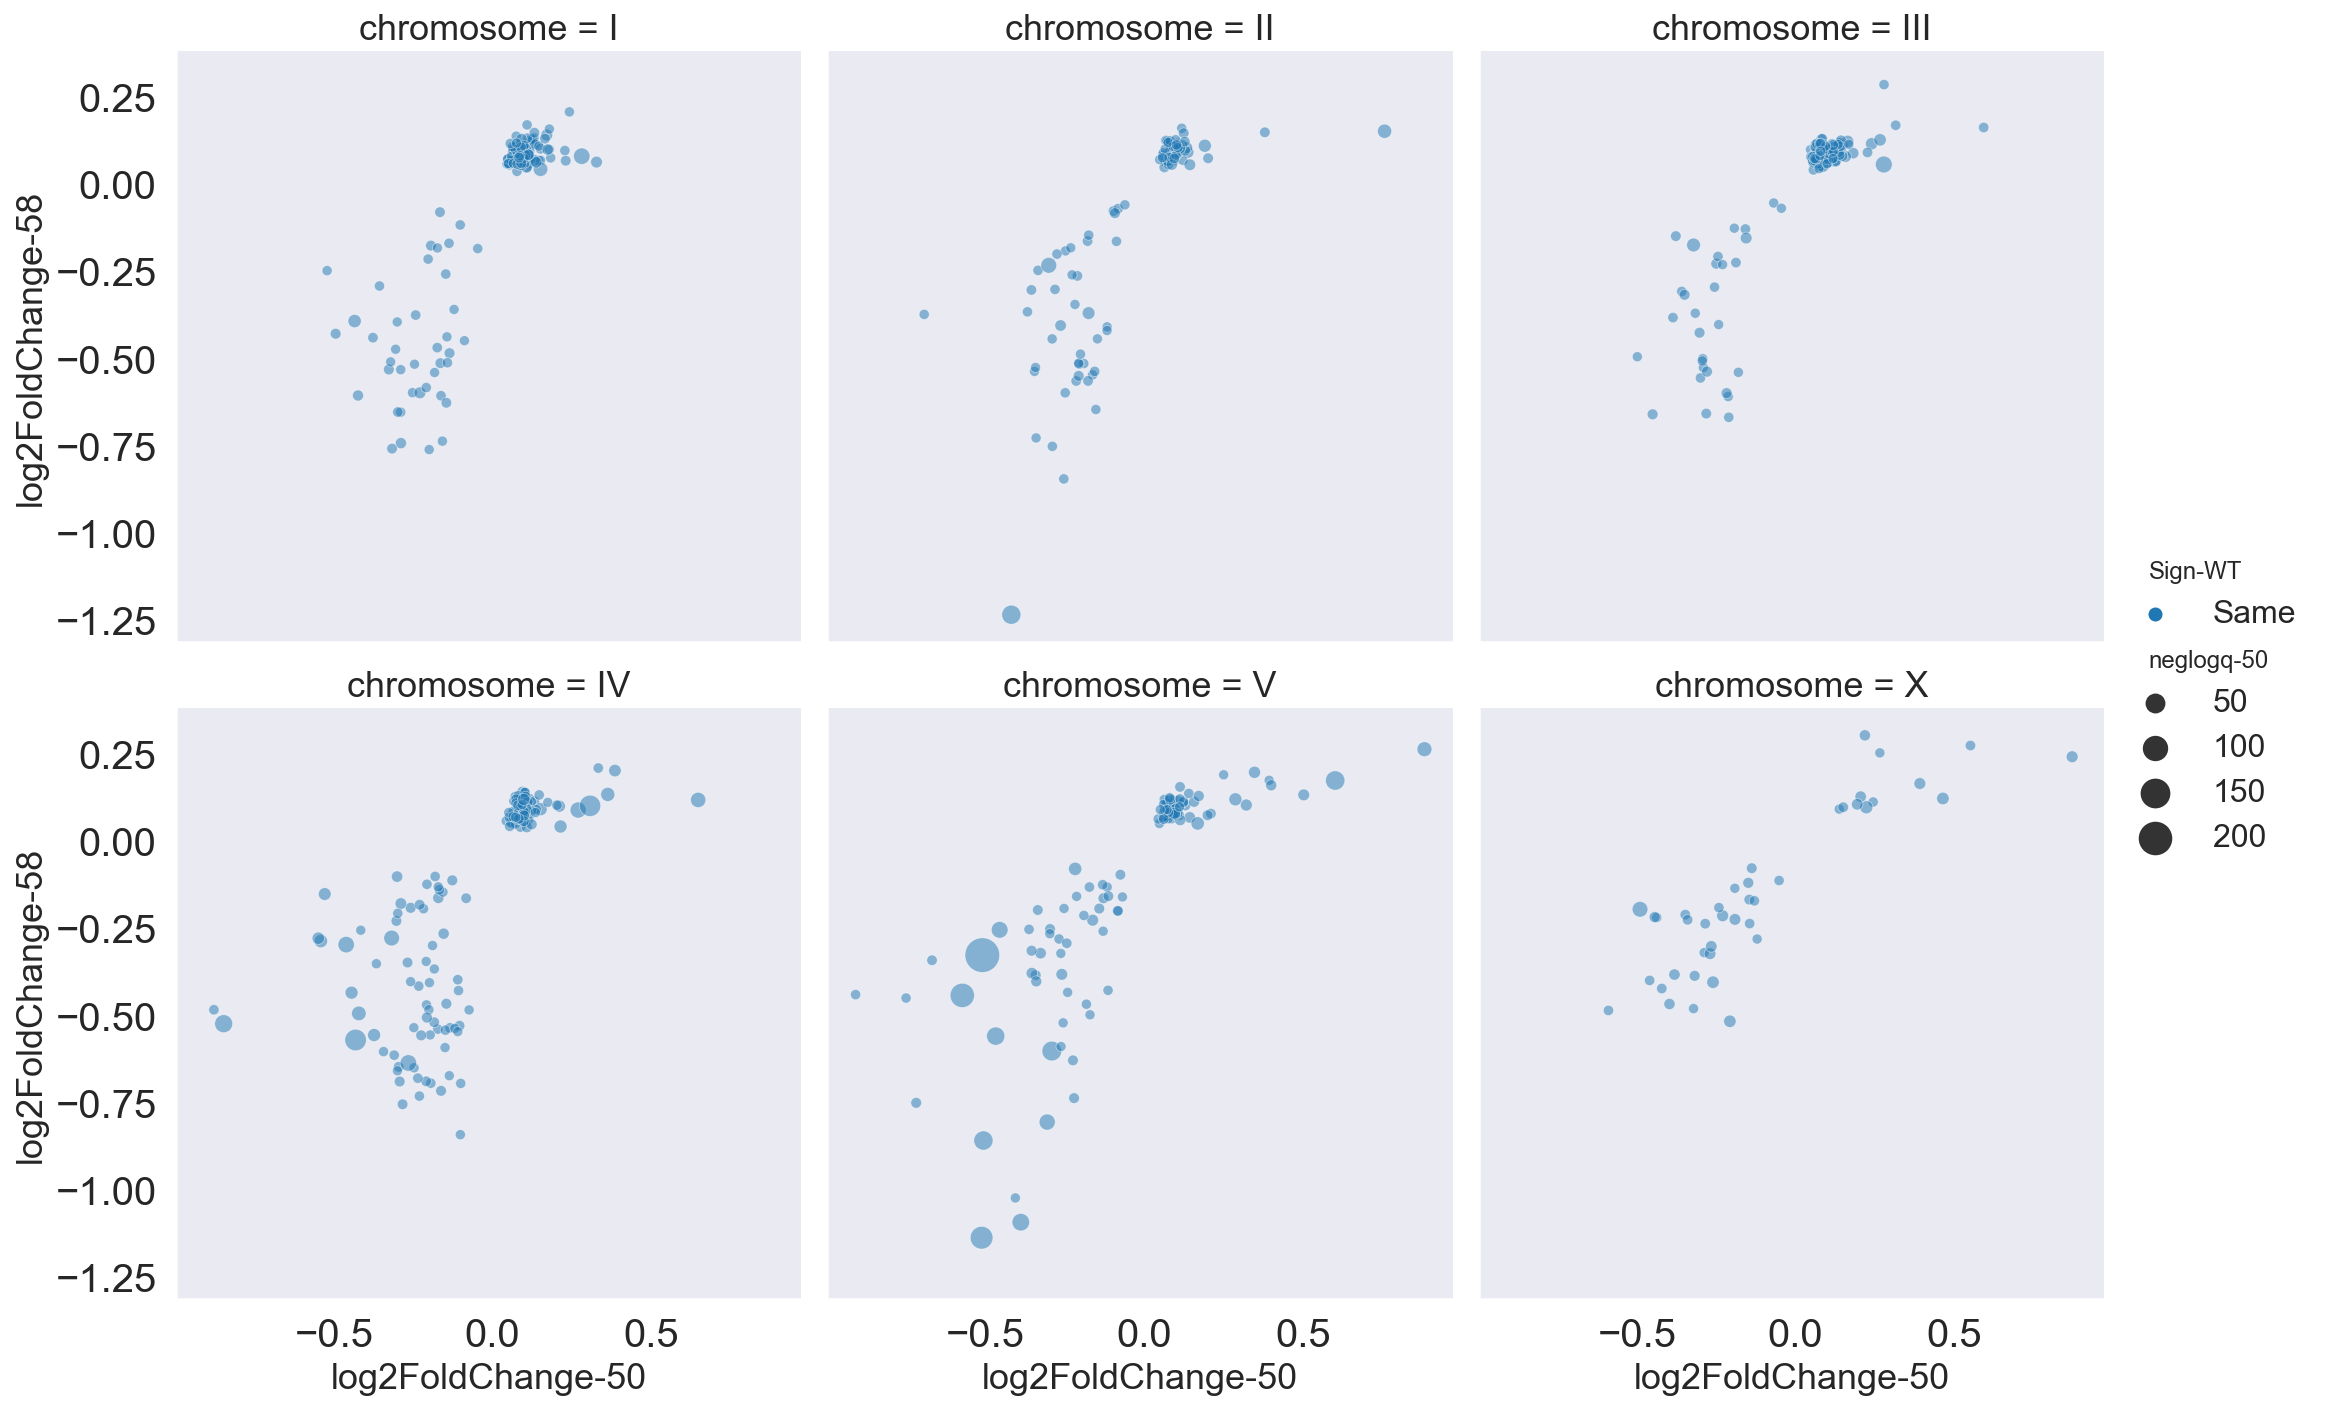

In [14]:
sns.relplot(
    data=res[AND],
    x="log2FoldChange-50", y="log2FoldChange-58",
    col="chromosome", size='neglogq-50', col_wrap=3,
    kind="scatter", sizes=(25, 300), hue='Sign-WT',
    alpha=0.5
)

# Is there evidence of enhancers?

Although we've established there is not a qualitative difference in the behavior of ascr#10 responsive genes, we wondered whether these genes would exhibit clumping, which would be suggestive of enhancers. To visually search for enhancers, we plot the fold-changes against the position of each gene along each chromosome.

First, we plot the 50hr experiment:

(-1.0, 1.0)

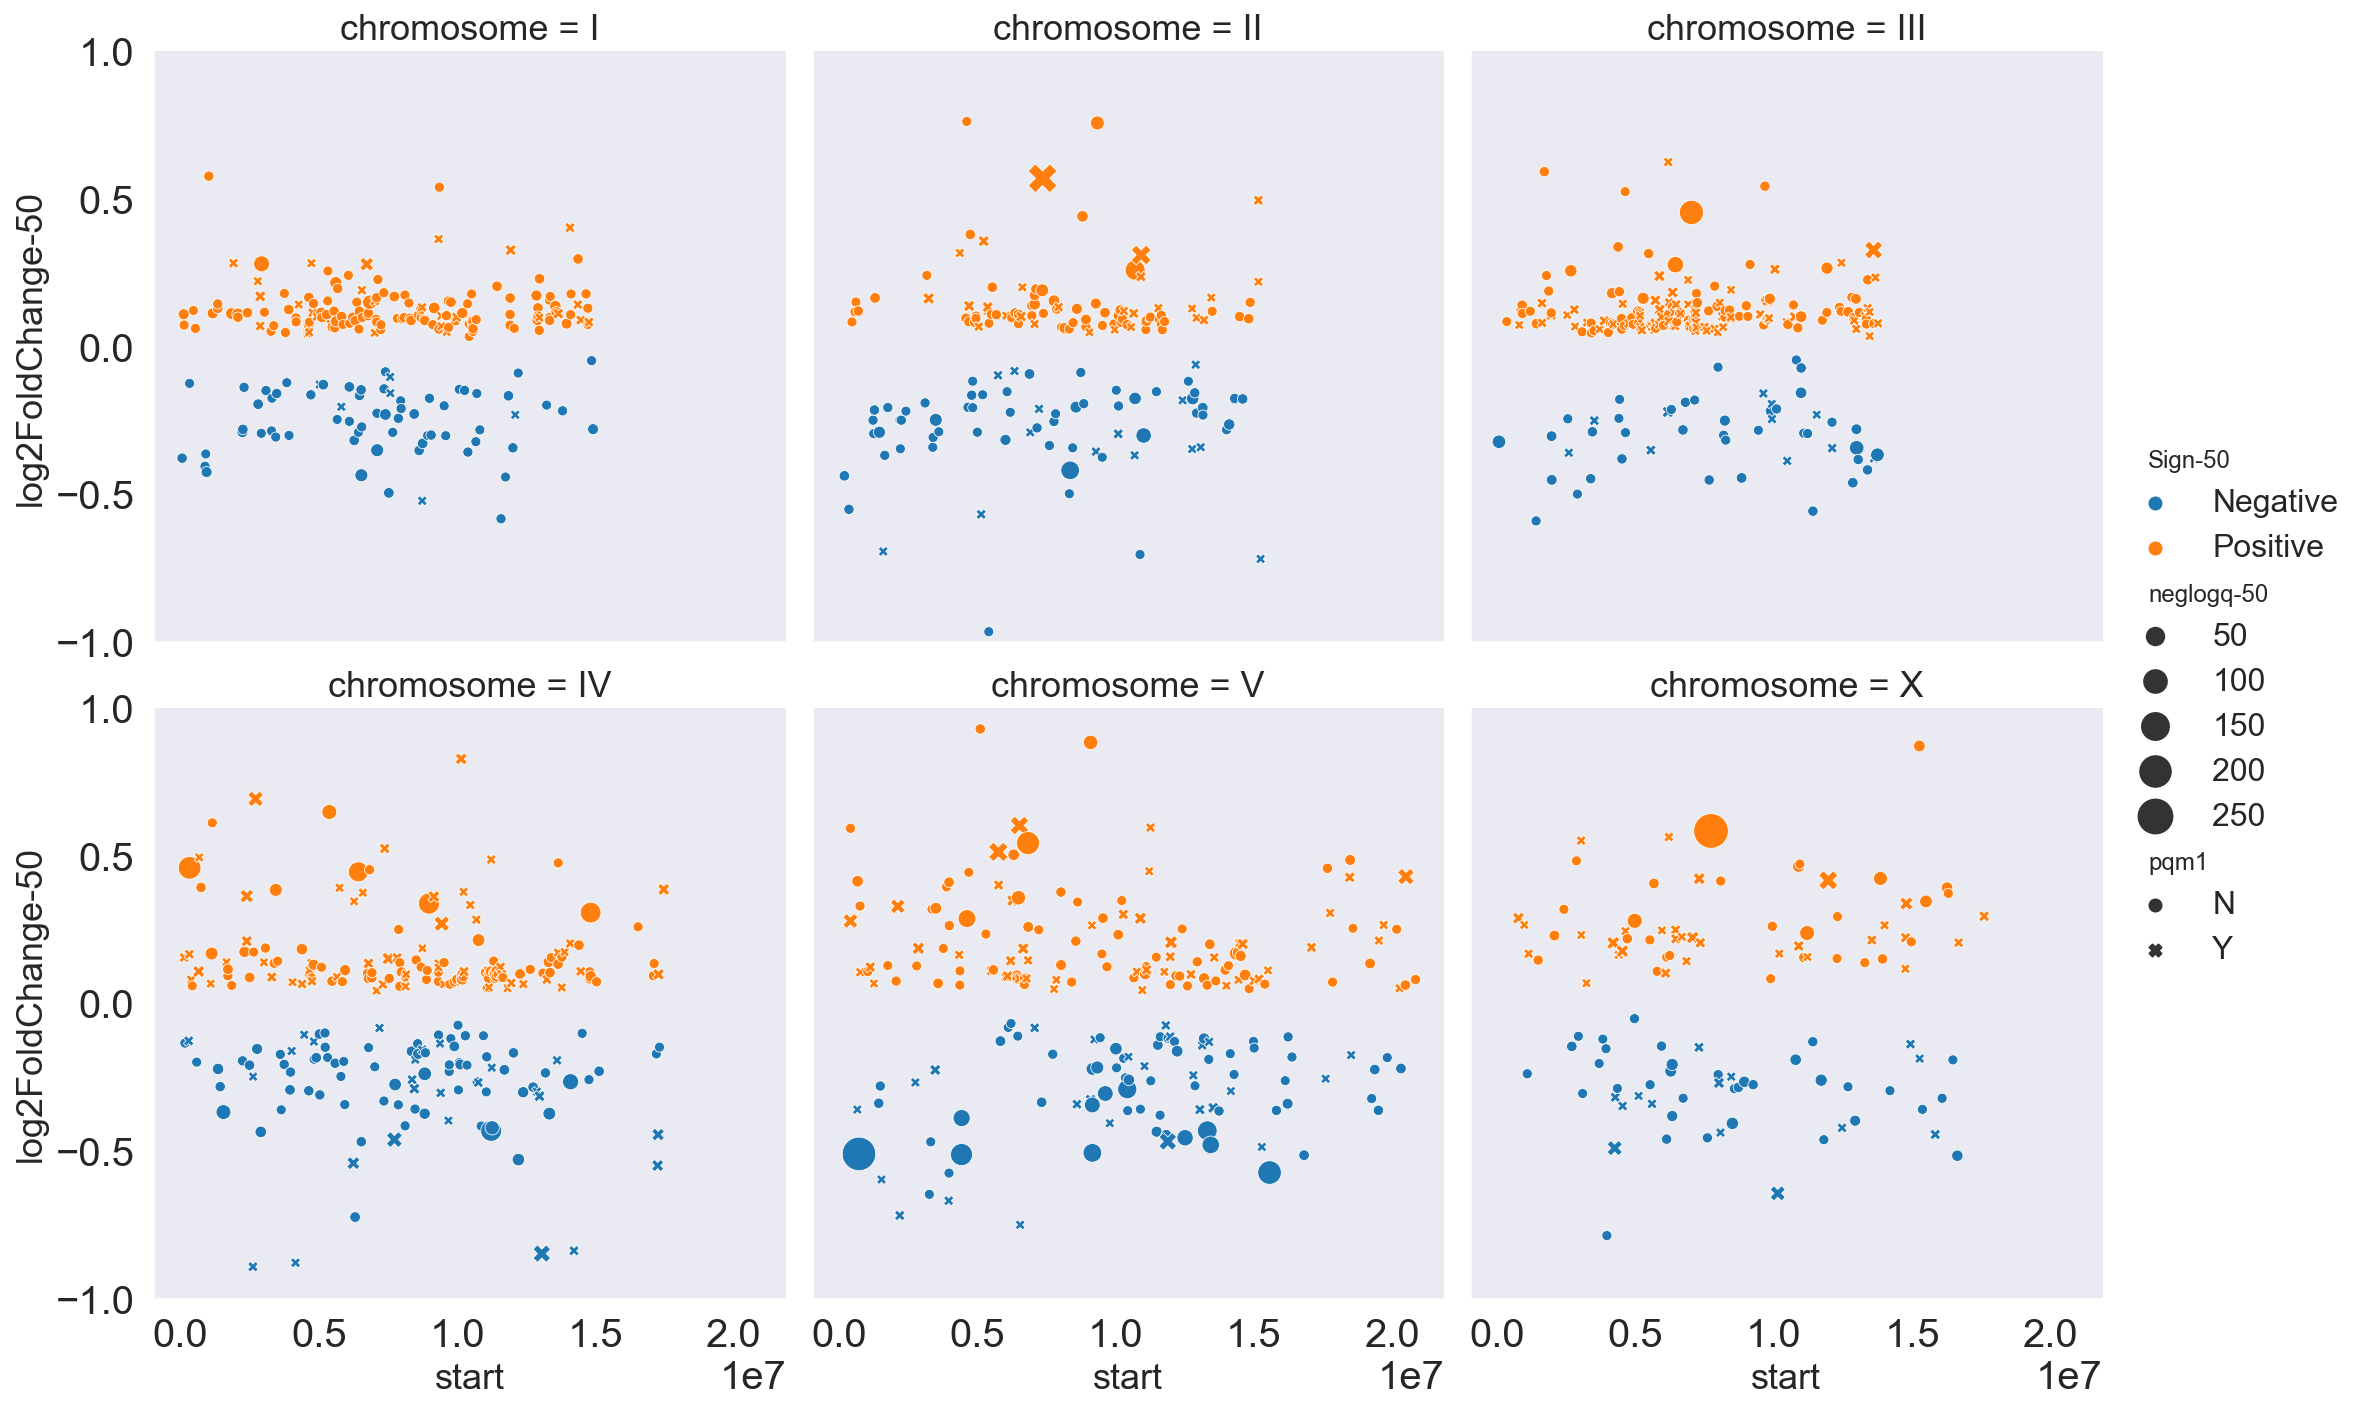

In [11]:
def relplot(x='50', both = False):
    if both is False:
        tmp = res[(res['padj-' + x] < 0.05)].copy()
    else:
        tmp = res[AND].copy()
    sns.relplot(
        data=tmp.rename(columns={'startposition': 'start'}),
        x="start", y="log2FoldChange-" + x,
        col="chromosome", size='neglogq-' + x, style='pqm1',
        kind="scatter", sizes=(25, 300), hue='Sign-' + x,
        col_wrap=3
    )

relplot('50')
plt.ylim(-1, 1)

Now we plot the 58hr experiment. Notice immediately that the positive fold-changes are much more moderated and tightly distributed. This could be because of a biological effect (refinement of the response), but it could also be the result of better measurements--recall the 58hr experiment was repeated at two separate times with three replicates each time, and the fold changes are calculated from the combined experiments. Thus, we draw no conclusions on this change in distribution.

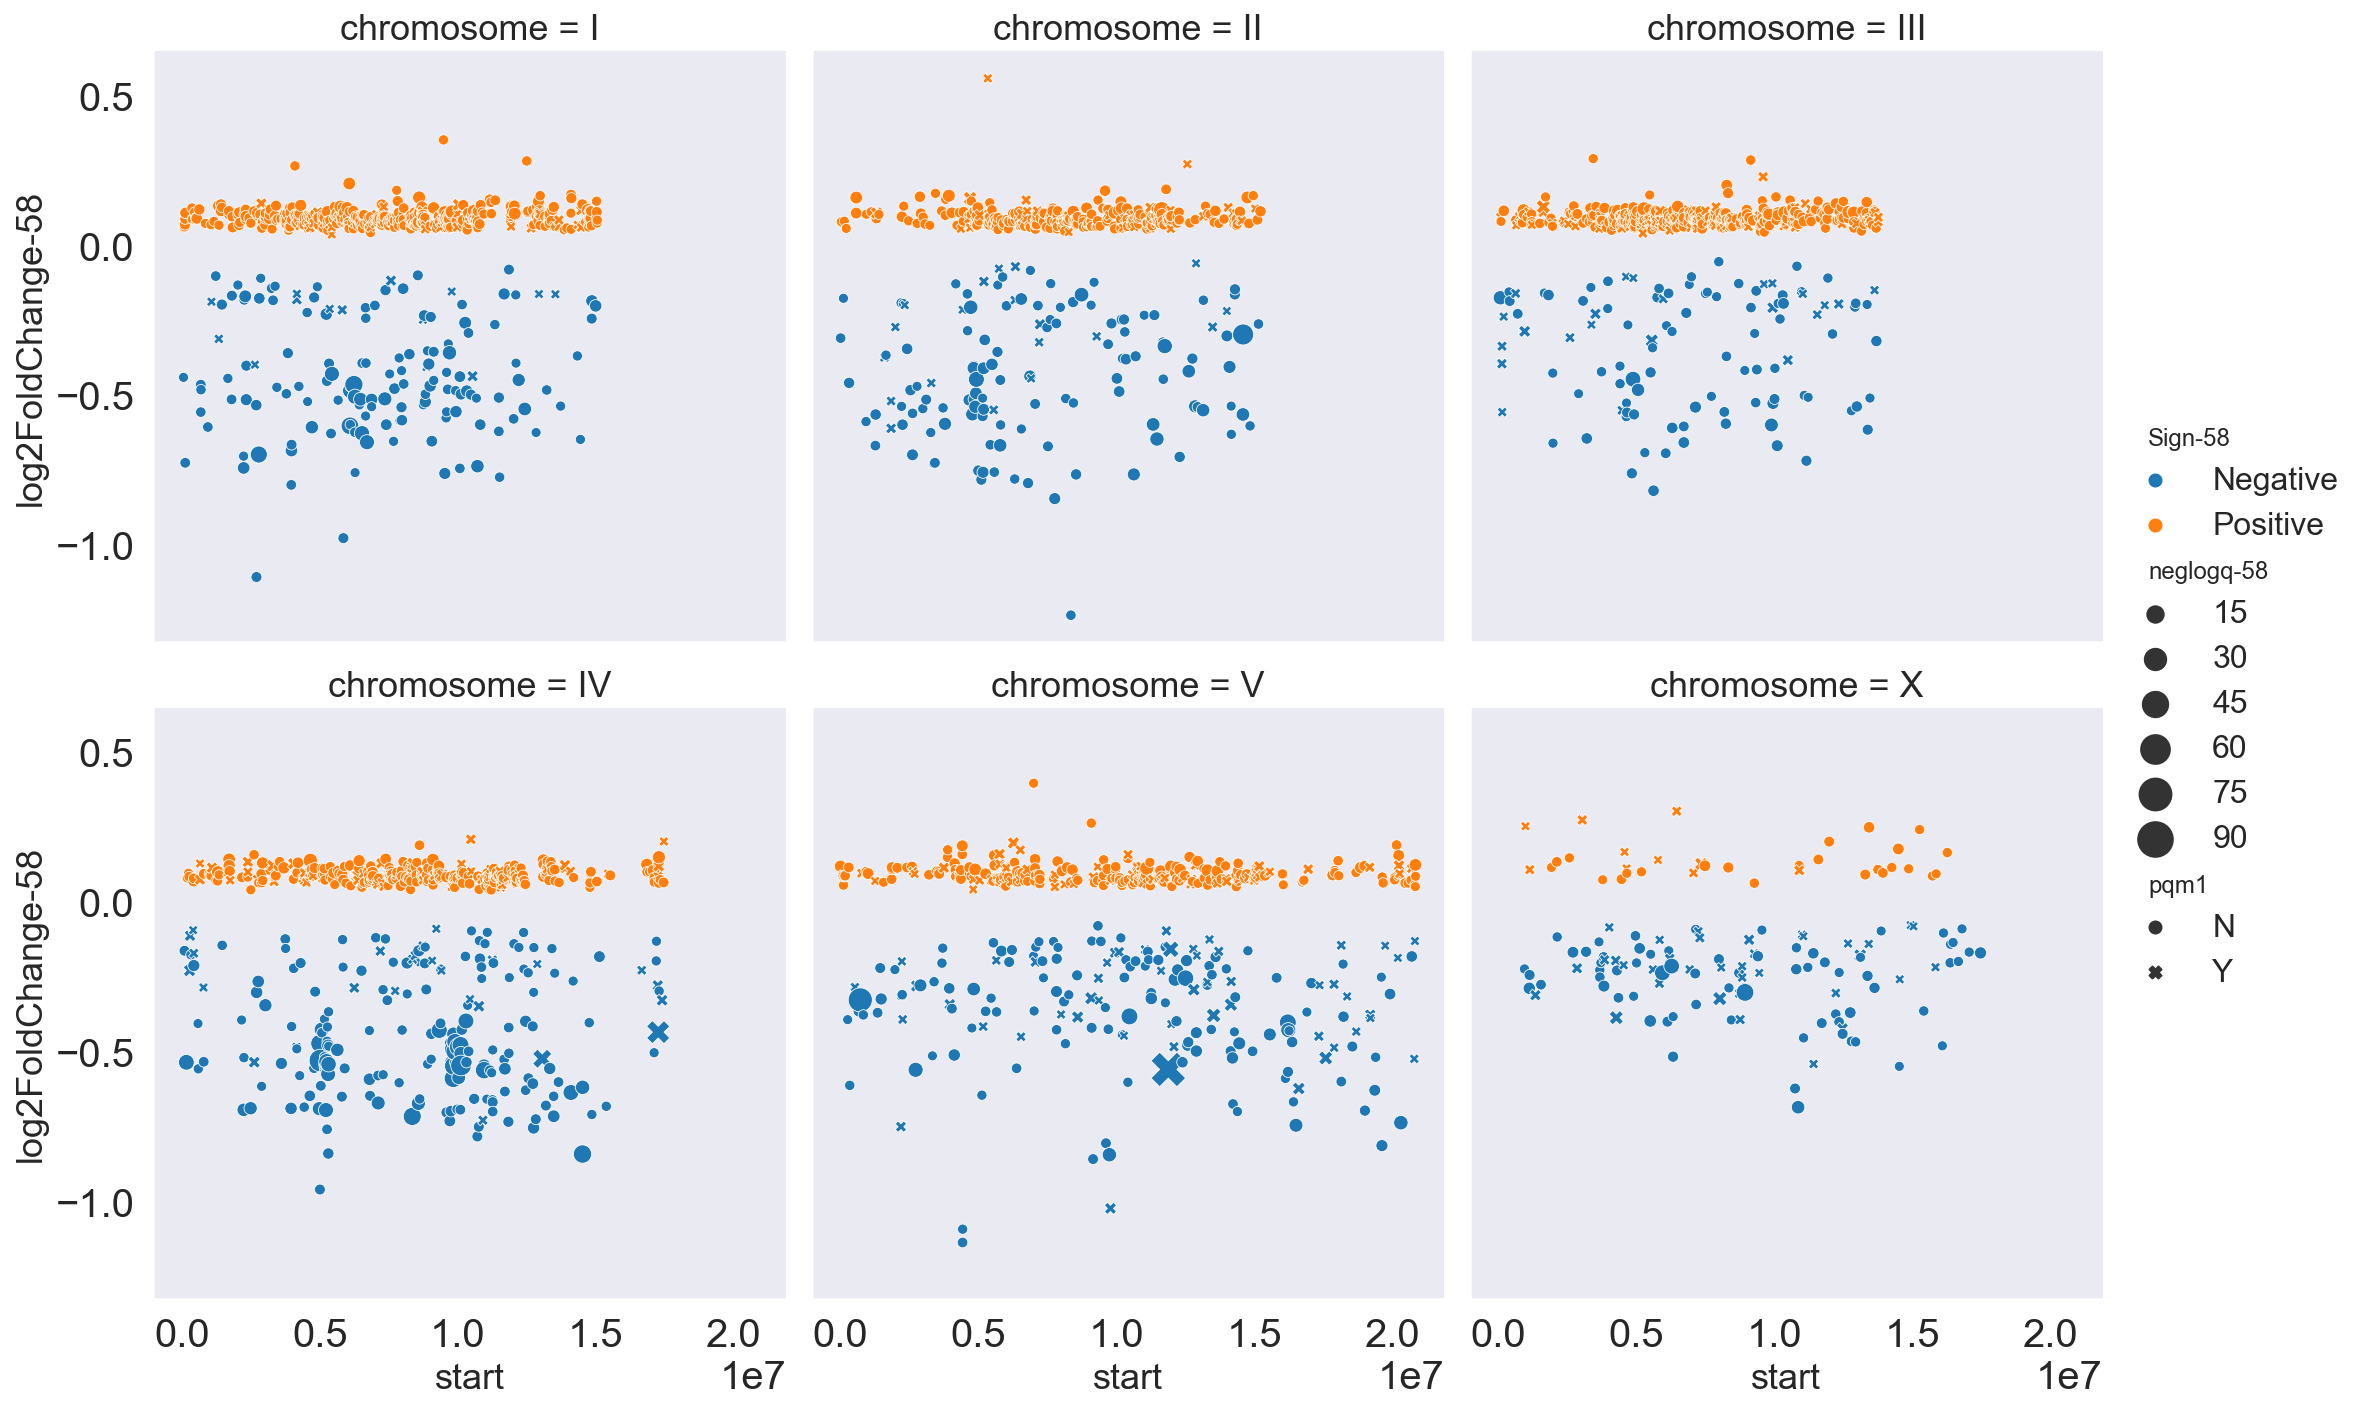

In [12]:
relplot('58')

At 58hrs, there seems to be a little clumping, certainly enough for this to merit a more thorough statistical treatment. The next section implements such a treatment.